# Exploratory Data Analysis

## Automobile Dataset

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the width of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|

### Load and understand your data
- The data consists of 205 instances and 14 features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Automobile_data1.csv')
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


### Check the number of null values in each column get a general description of your data

In [4]:
df.shape

(205, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
symboling       205 non-null int64
make            205 non-null object
fuel-type       205 non-null object
body-style      205 non-null object
drive-wheels    205 non-null object
wheel-base      205 non-null float64
length          205 non-null float64
width           205 non-null float64
height          205 non-null float64
horsepower      205 non-null int64
peak-rpm        205 non-null int64
highway-mpg     205 non-null int64
city-mpg        205 non-null int64
price           205 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


### Plot a histogram showing the distribution of the car prices (target variable) and if any skewness, print the value of skewness

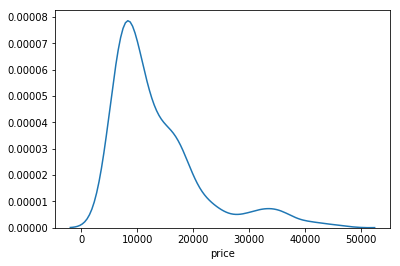

In [6]:
sns.distplot(df['price'],hist=False)

In [10]:
df['price'].skew(),skew(df['price'])

(1.684325214046249, 1.671975747887442)

### Plot a countplot of the 'make' column of the dataset which represents the different car makers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

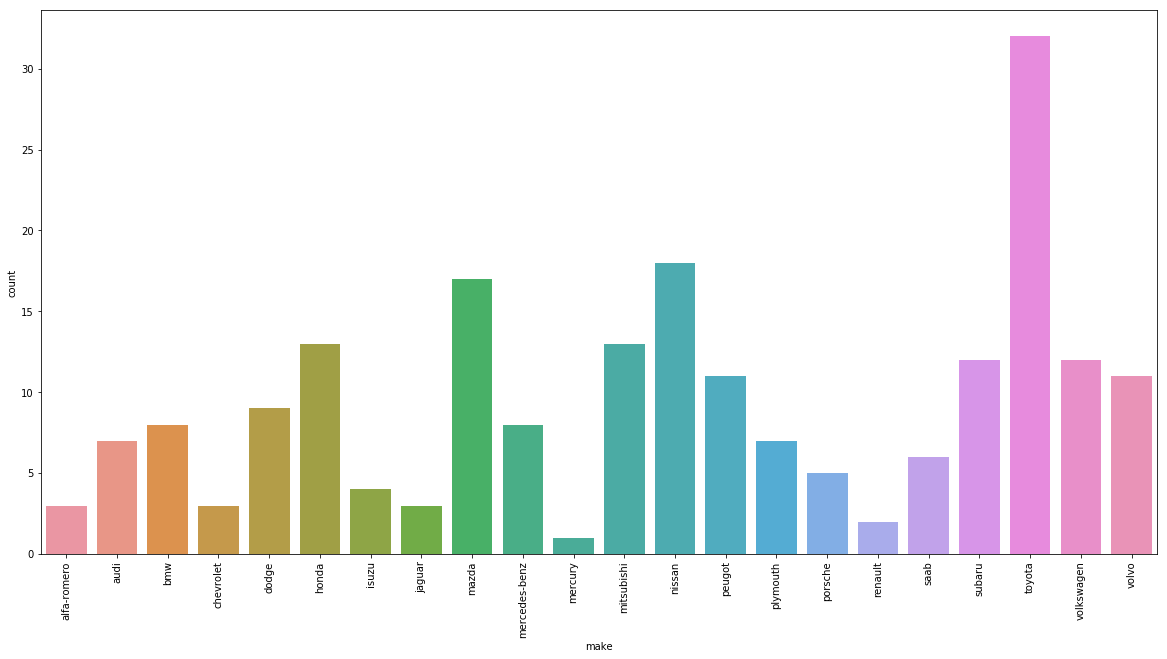

In [20]:
plt.figure(figsize = (20,10))
sns.countplot(df['make'])
plt.xticks(rotation = 90)

### Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

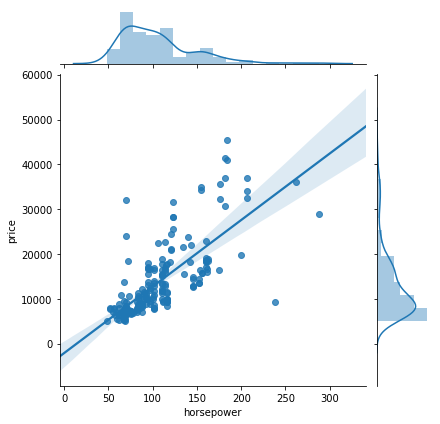

In [25]:
sns.jointplot(data = df,x = 'horsepower', y = 'price',kind = 'reg')

### Plot the insurance risk ratings for all the automobiles

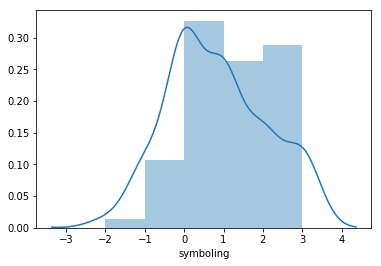

In [27]:
sns.distplot(df['symboling'], bins = 5)

### Plot a pie chart of the fuel-type of the automobiles

([<matplotlib.patches.Wedge at 0x13c63ce8160>,
 [Text(-1.048736003975903, 0.3318927446701041, 'gas'),
  Text(1.048735972901857, -0.33189284285985376, 'diesel')],
 [Text(-0.5720378203504926, 0.18103240618369312, '90.24'),
  Text(0.5720378034010128, -0.1810324597417384, '9.76')])

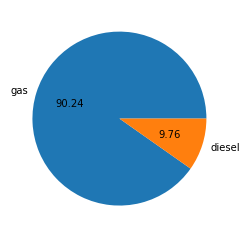

In [51]:

plt.pie(df['fuel-type'].value_counts(),labels = ['gas','diesel'],autopct = '%.2f')

### Plot the pearson correlation of all the features in a heatmap.

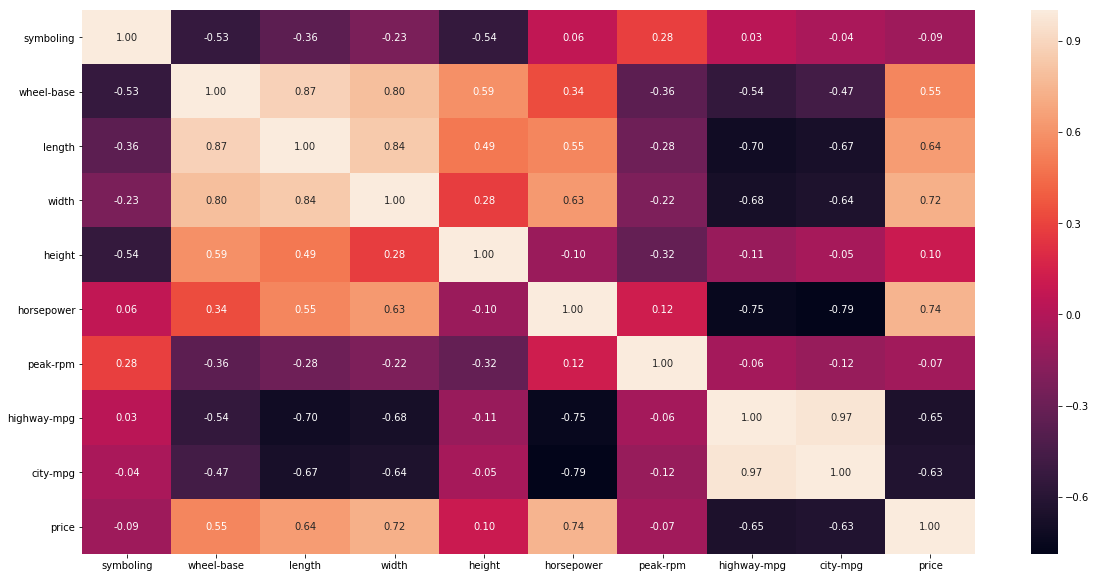

In [53]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True, fmt = '.2f')

### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

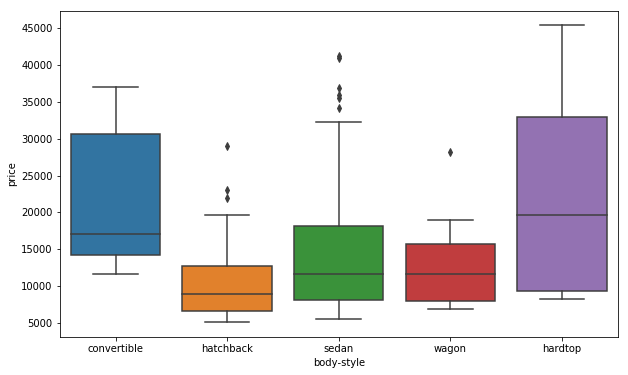

In [57]:
plt.figure(figsize = (10,6))
sns.boxplot(df['body-style'],df["price"])

### Plot a boxplot showing the variablity in the 'price' for each 'make' of the car 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

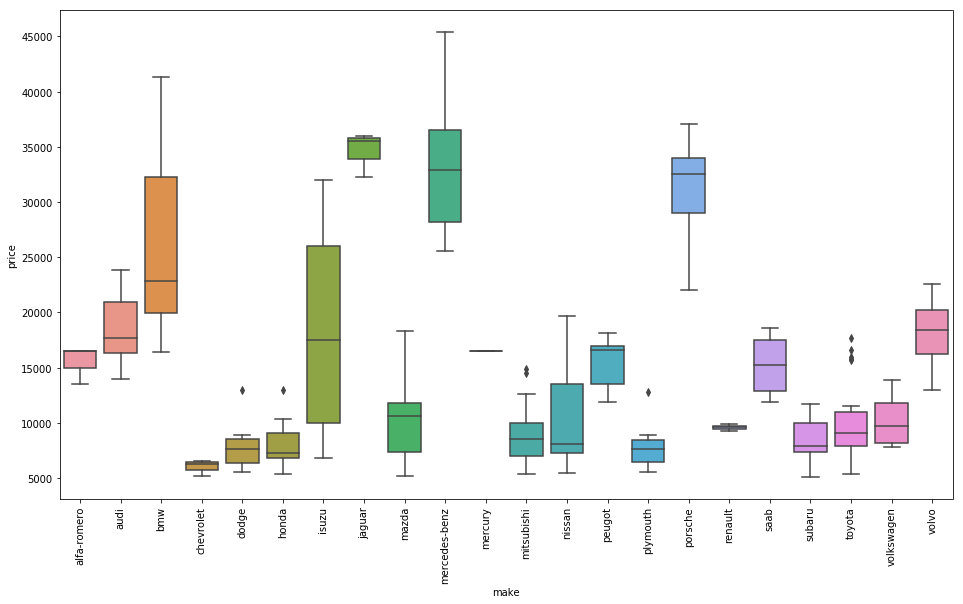

In [71]:
plt.figure(figsize = (16,9))
sns.boxplot(df['make'],df["price"])
plt.xticks(rotation = 90)

## Data Preprocessing

In [2]:
df_1 = pd.read_csv('Automobile_data.csv')
df_1.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Impute the missing values of the numerical data with mean of the particular column (Make sure you replace "?" by "NaN" before Imputing).

In [3]:
len(df_1[df_1['normalized-losses'] == '?'])

41

In [4]:
from sklearn.preprocessing import Imputer
df_1['normalized-losses'] = df_1['normalized-losses'].replace('?',np.nan)
impt = Imputer(missing_values= np.nan, strategy='mean')
impt = impt.fit(df_1[['normalized-losses']])
df_1['normalized-losses'] = impt.transform(df_1[['normalized-losses']])
df_1['normalized-losses'].head()

0    122.0
1    122.0
2    122.0
3    164.0
4    164.0
Name: normalized-losses, dtype: float64

In [5]:
df_1[df_1['horsepower'] == '?']
from sklearn.preprocessing import Imputer
df_1['horsepower'] = df_1['horsepower'].replace('?',np.nan)
impt = Imputer(missing_values= np.nan, strategy='mean')
impt = impt.fit(df_1[['horsepower']])
df_1['horsepower'] = impt.transform(df_1[['horsepower']])
df_1['horsepower'].head()

0    111.0
1    111.0
2    154.0
3    102.0
4    115.0
Name: horsepower, dtype: float64


### Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.

In [6]:
cols_1 = df_1._get_numeric_data().columns
len(cols_1)


9

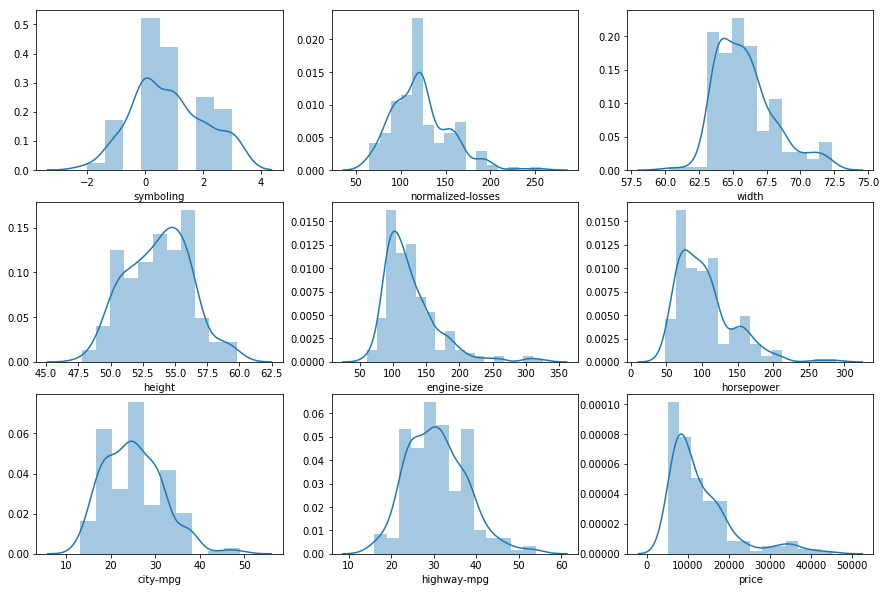

In [7]:
cols_1 = df_1._get_numeric_data().columns
n = 1
plt.figure(figsize = (15,10))
for i in cols_1:
    plt.subplot(3,3,n)
    sns.distplot(df_1[i])
    n+=1
    

In [8]:
df_1.skew()

symboling            0.211072
normalized-losses    0.854802
width                0.904003
height               0.063123
engine-size          1.947655
horsepower           1.397763
city-mpg             0.663704
highway-mpg          0.539997
price                1.805173
dtype: float64

In [59]:
#df_1['engine-size'] = np.sqrt(df_1['engine-size'])
#df_1['horsepower'] = np.sqrt(df_1['horsepower'])
#df_1['price'] = np.sqrt(df_1['price'])

In [60]:
df_1.skew()

symboling            0.211072
normalized-losses    0.854802
width                0.904003
height               0.063123
engine-size          1.364372
horsepower           0.889487
city-mpg             0.663704
highway-mpg          0.539997
price                1.214087
dtype: float64

In [9]:
df_1['engine-size'] = np.log(df_1['engine-size'])
df_1['horsepower'] = np.log(df_1['horsepower'])
df_1['price'] = np.log(df_1['price'])

In [10]:
df_1.skew()

symboling            0.211072
normalized-losses    0.854802
width                0.904003
height               0.063123
engine-size          0.857828
horsepower           0.470625
city-mpg             0.663704
highway-mpg          0.539997
price                0.669401
dtype: float64

### scaling using maxmin and standard scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer.fit(df_1[['engine-size']])
df_1['engine-size'] = normalizer.transform(df_1[['engine-size']])
df_1['engine-size'].head()

0    0.451462
1    0.451462
2    0.544746
3    0.346340
4    0.478383
Name: engine-size, dtype: float64

In [14]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
normalizer.fit(df_1[['engine-size']])
df_1['engine-size'] = normalizer.transform(df_1[['engine-size']])
df_1['engine-size'].head()

0    0.238597
1    0.238597
2    0.792476
3   -0.385569
4    0.398443
Name: engine-size, dtype: float64

###  Label Encode the categorical features.


In [20]:
cols_2 = df_1.columns
num_cols = df_1._get_numeric_data().columns
cat = list(set(cols_2) - set(num_cols))

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in cat:
    df_1[i] = label_encoder.fit_transform(df_1[i])


In [38]:
df_1.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,64.1,48.8,0,0.451462,4.709530,21,27,9.510075
1,3,122.0,0,1,0,2,0,64.1,48.8,0,0.451462,4.709530,21,27,9.711116
2,1,122.0,0,1,2,2,0,65.5,52.4,5,0.544746,5.036953,19,26,9.711116
3,2,164.0,1,1,3,1,0,66.2,54.3,3,0.346340,4.624973,24,30,9.543235
4,2,164.0,1,1,3,0,0,66.4,54.3,3,0.478383,4.744932,18,22,9.767095


In [16]:
pd.get_dummies(df_1).shape

(205, 50)

In [17]:
df_1.shape

(205, 15)

### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [18]:
df_1['area'] = df_1['height'] * df_1['width']

In [19]:
df_1.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price,area
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,0.238597,4.709530,21,27,9.510075,3128.08
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,0.238597,4.709530,21,27,9.711116,3128.08
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,0.792476,5.036953,19,26,9.711116,3432.20
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,-0.385569,4.624973,24,30,9.543235,3594.66
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,0.398443,4.744932,18,22,9.767095,3605.52


# Thank You
***
### Next Session: Logistic Regression
For more queries - Reach out to academics@greyatom.com 